In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import chardet
with open('/content/sample_data/IMDb Movies India.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']
df = pd.read_csv('/content/sample_data/IMDb Movies India.csv', encoding=encoding)
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
df['Rating'].skew()

-0.345551925659791

<Axes: xlabel='Rating', ylabel='Density'>

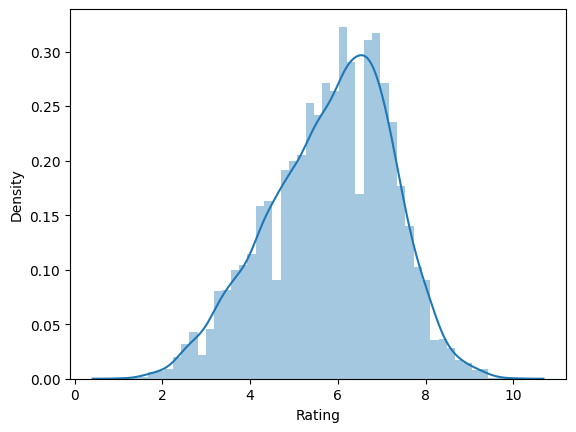

In [ ]:
 #-0.34 skew value is in range [-1,1],the value is negative
sns.distplot(df['Rating'],kde=True)

In [ ]:
df['Year'].fillna('Unknown',inplace=True)
a=df.isnull().sum()
a

Name           0
Year           0
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
x=df['Rating'].isnull().sum()
x

7590

In [ ]:
df['Rating'].fillna(df.groupby('Year')['Rating'].transform('median'), inplace=True)


In [ ]:
df['Rating'].fillna(df['Rating'].median(),inplace=True)

In [ ]:
df['Duration'].fillna(0,inplace=True)
df['Duration'].head()

0          0
1    109 min
2     90 min
3    110 min
4    105 min
Name: Duration, dtype: object

In [ ]:
df['Duration'].isnull().sum()

0

In [ ]:
# Extract numerical part of duration and convert it to numerical format
df['Duration_numeric'] = df['Duration'].str.extract(r'(\d+)').astype(float)

# Extract unit part of duration and store it in a separate column
df['Duration_unit'] = df['Duration'].str.extract(r'(\D+)')

# Display the modified DataFrame
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Duration_numeric,Duration_unit
0,,Unknown,0,Drama,6.20,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,NaN,NaN
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.00,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,109.0,min
2,#Homecoming,(2021),90 min,"Drama, Musical",6.85,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,90.0,min
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.40,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,110.0,min
4,...And Once Again,(2010),105 min,Drama,5.50,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,105.0,min


In [ ]:
df['Duration_numeric'].isnull().sum()

8269

In [ ]:
df['Duration_numeric'].fillna(df.groupby('Year')['Duration_numeric'].transform('median'), inplace=True)


In [ ]:
df['Duration_numeric'].fillna(df['Duration_numeric'].median(),inplace=True)

In [ ]:
df['Duration_unit'].unique()

array([nan, ' min'], dtype=object)

In [ ]:
df['Duration_unit'].fillna(df['Duration_unit'].mode()[0],inplace=True)

In [ ]:
df.isnull().sum()

Name                   0
Year                   0
Duration               0
Genre               1877
Rating                 0
Votes               7589
Director             525
Actor 1             1617
Actor 2             2384
Actor 3             3144
Duration_numeric       0
Duration_unit          0
dtype: int64

In [ ]:
  df['Genre'].nunique()

485

In [ ]:
df.shape

(15509, 12)

In [ ]:
df['Genre'].nunique()
df.shape
df['Genre'].value_counts().head(10)



Drama                   2780
Action                  1289
Thriller                 779
Romance                  708
Drama, Romance           524
Comedy                   495
Action, Crime, Drama     455
Drama, Family            418
Horror                   322
Action, Drama            316
Name: Genre, dtype: int64

In [ ]:
df['Genre'].value_counts().max()

2780

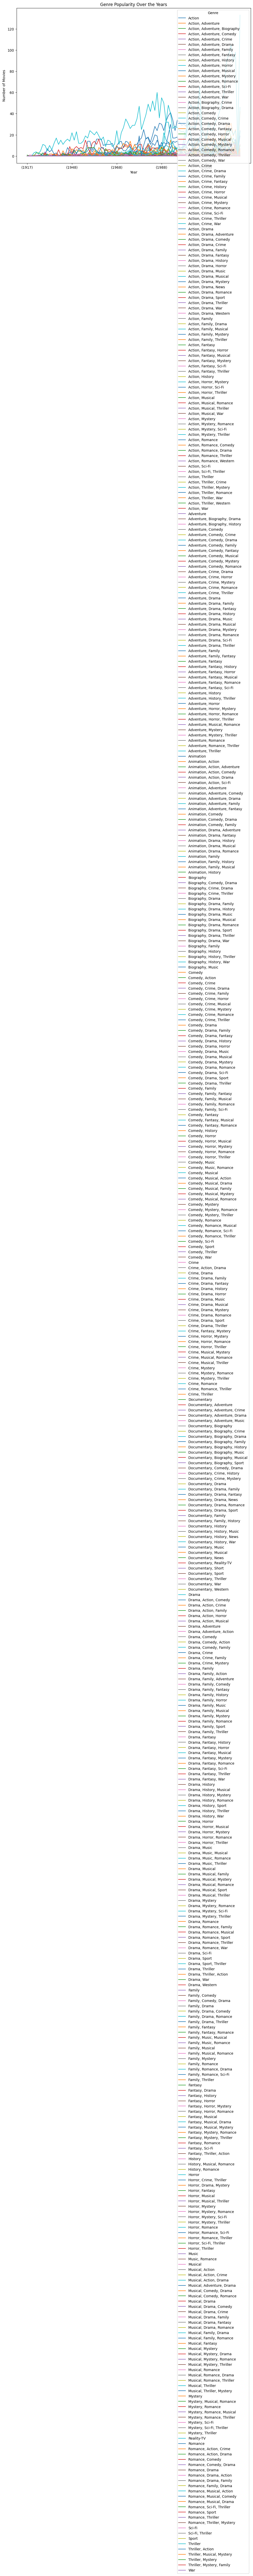

In [ ]:
# Are there any notable trends or patterns in genre popularity over the years? For example, do certain genres become more popular in specific time periods?

df.groupby('Year')['Genre'].value_counts().unstack().fillna(0).plot(figsize=(12,8))
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Genre Popularity Over the Years')
plt.show()


In [ ]:
df.isnull().sum()

Name                   0
Year                   0
Duration               0
Genre               1877
Rating                 0
Votes               7589
Director             525
Actor 1             1617
Actor 2             2384
Actor 3             3144
Duration_numeric       0
Duration_unit          0
dtype: int64

In [ ]:
train=pd.read_csv('/content/sample_data/IMDb Movies India.csv', encoding=encoding)
df['Genre']=train['Genre'].copy()
df['Genre'].fillna(df.groupby('Year')['Genre'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'Unknown')), inplace=True)


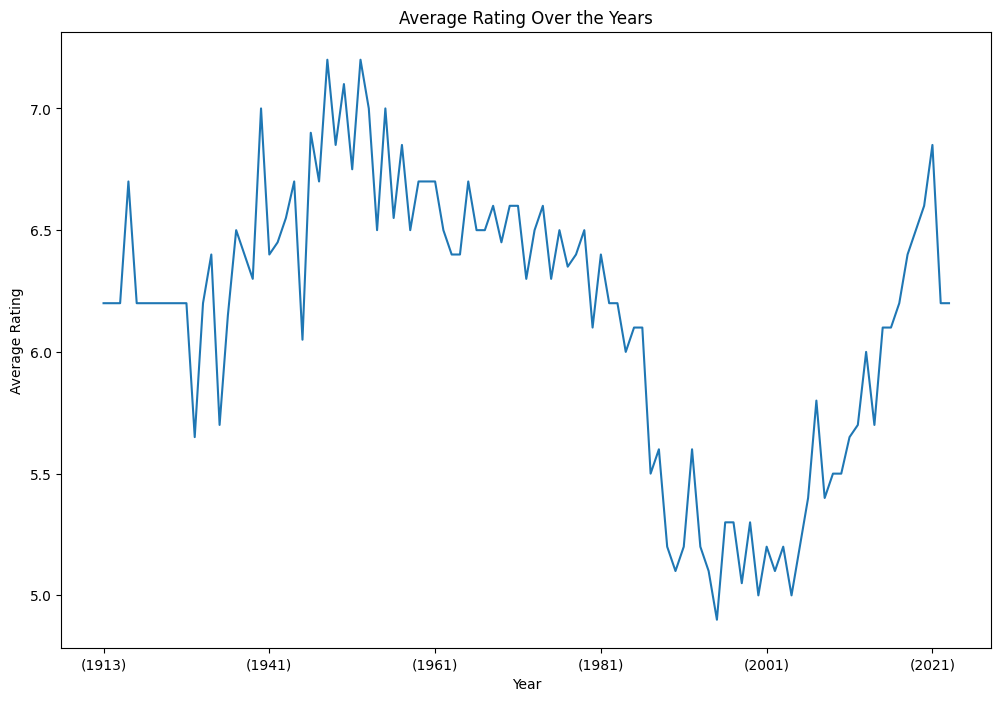

<Figure size 400x300 with 0 Axes>

In [ ]:
df.groupby('Year')['Rating'].median().plot(figsize=(12,8))
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating Over the Years')
plt.figure(figsize=(4,3))
plt.show()


In [ ]:
df.shape

(15509, 12)

In [ ]:
df['Director'].isnull().sum()

525

In [ ]:
missing_values = df.isnull().sum()
features_with_missing_values = missing_values[missing_values > 0].index.tolist()

In [ ]:
for feature in features_with_missing_values:
  missing_percentage = missing_values[feature] / len(df) * 100
  print(f"Missing values in {feature}: {missing_percentage:.2f}%")

Missing values in Votes: 48.93%
Missing values in Director: 3.39%
Missing values in Actor 1: 10.43%
Missing values in Actor 2: 15.37%
Missing values in Actor 3: 20.27%


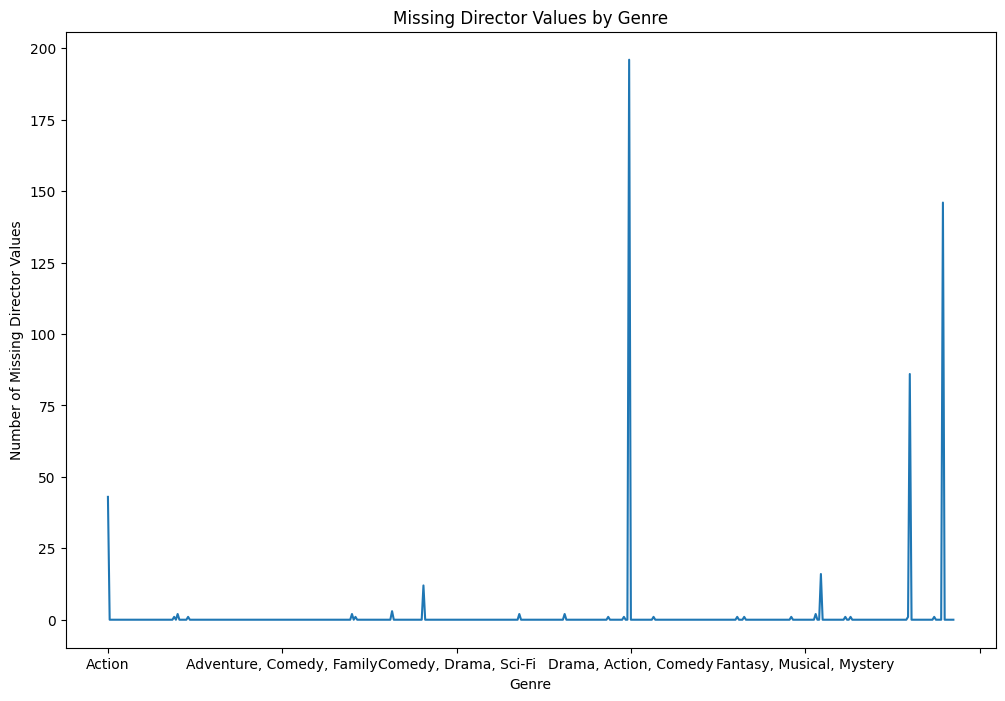

In [ ]:
# Group the DataFrame by 'Genre' and count the number of missing 'Director' values for each genre
missing_directors_by_genre = df.groupby('Genre')['Director'].apply(lambda x: x.isnull().sum())

# Plot the results
missing_directors_by_genre.plot(figsize=(12,8))  # Plot the number of missing director values by genre
plt.xlabel('Genre')  # Set the x-axis label
plt.ylabel('Number of Missing Director Values')  # Set the y-axis label
plt.title('Missing Director Values by Genre')  # Set the plot title
plt.show()  # Display the plot


In [ ]:
df['Director'].fillna(df.groupby('Year')['Director'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'Unknown')), inplace=True)


In [ ]:
df['Director'].nunique()

5938

In [ ]:
df['Director'].unique()

array(['J.S. Randhawa', 'Gaurav Bakshi', 'Soumyajit Majumdar', ...,
       'Mozez Singh', 'Ved Prakash', 'Kiran Thej'], dtype=object)

In [ ]:
# Define a function to impute missing values with mode by year grouping
def impute_mode_by_year(df, column):
    return df[column].fillna(df.groupby('Year')[column].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown'))

# Impute missing actor values with mode by year grouping for each actor feature
df['Actor 1'] = impute_mode_by_year(df, 'Actor 1')
df['Actor 2'] = impute_mode_by_year(df, 'Actor 2')
df['Actor 3'] = impute_mode_by_year(df, 'Actor 3')


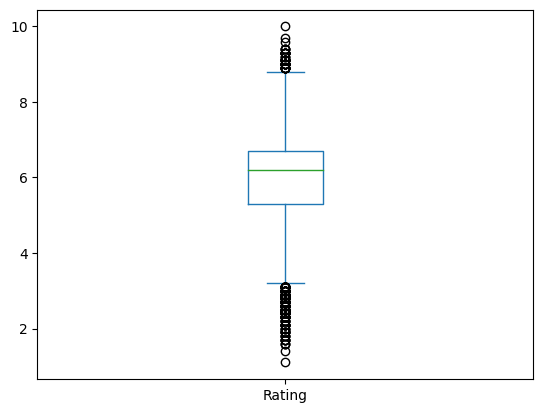

In [ ]:
df['Rating'].quantile([0.05, 0.95])
df['Rating'].plot(kind='box')
plt.show()


In [ ]:
def detect_outliers(df, column):
  # Calculate the mean and standard deviation of the column
  mean = df[column].mean()
  std = df[column].std()

  # Calculate the z-score for each value in the column
  z_scores = (df[column] - mean) / std

  # Identify the values that are more than 3 standard deviations away from the mean
  outliers = df[z_scores > 3]

  # Return the outliers
  return outliers
detect_outliers(df,'Rating')


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Duration_numeric,Duration_unit
1314,Ashok Vatika,(2018),97 min,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi,97.0,min
1729,Baikunth,(2021),72 min,Family,9.3,29,Vishwa Bhanu,Vishwa Bhanu,Sangam Shukla,Vijay Thakur,72.0,min
2563,Breed,(2020),0,Drama,9.6,48,Bobby Kumar,Bobby Kumar,Ashfaq,Fasih Choudhry,106.0,min
5077,Gho Gho Rani,(2019),105 min,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar,105.0,min
5125,God of gods,(2019),90 min,Documentary,9.3,46,Venkatesh Bk,Tejaswini Manogna,Triyug Mantri,Raj Singh Verma,90.0,min
5410,Half Songs,(2021),79 min,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani,79.0,min
6852,June,(2021),93 min,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi,93.0,min
8339,Love Qubool Hai,(2020),94 min,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari,94.0,min
8344,Love Sorries,(2021),101 min,"Comedy, Drama, Romance",9.3,79,Gautam Joshi,Prashant Chaubey,Puneet Chouksey,Amitabh Gupta,101.0,min
8564,Mahakaleshwar - Legends of Shiva,(2019),0,Documentary,9.3,18,Avinash Kumar Singh,Akshay Kumar,Bhumi Pednekar,Manoj Pahwa,115.0,min


In [ ]:
df['Rating'].skew()

-0.6540512819642407

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
encoder = LabelEncoder()

# Fit the encoder to the 'Genre' column
encoder.fit(df['Genre'])

# Transform the 'Genre' column using the encoder
df['Genre'] = encoder.transform(df['Genre'])

In [ ]:
df.rename(columns={'Actor 1': 'First Actor', 'Actor 2': 'Second Actor', 'Actor 3': 'Third Actor'}, inplace=True)


In [ ]:
df['Genre'] = df['Genre'].astype('category')
df['Genre_encoded'] = df['Genre'].cat.codes
df['Genre_encoded'].head()

0    299
1    299
2    351
3    228
4    299
Name: Genre_encoded, dtype: int16

In [ ]:
df['First Actor'] = df['First Actor'].astype('category')
df['First Actor_encoded'] = df['First Actor'].cat.codes

df['Second Actor'] = df['Second Actor'].astype('category')
df['Second Actor_encoded'] = df['Second Actor'].cat.codes

df['Third Actor'] = df['Third Actor'].astype('category')
df['Third Actor_encoded'] = df['Third Actor'].cat.codes


In [ ]:
df['Director'] = df['Director'].astype('category')
df['Director_encoded'] = df['Director'].cat.codes
df['Director_encoded'].head()


0    1926
1    1548
2    5123
3    3319
4     385
Name: Director_encoded, dtype: int16

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# DataFrame 'df' containing your dataset with columns: 'Genre_encoded', 'First Actor_encoded', 'Second Actor_encoded', 'Third Actor_encoded', 'Director_encoded', 'Rating'

# Define features (X) and target variable (y)
X = df[['Genre_encoded', 'First Actor_encoded', 'Second Actor_encoded', 'Third Actor_encoded', 'Director_encoded']]
y = df['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model using mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 0.8392483868399149


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Assume you have a DataFrame 'df' containing your dataset with columns: 'Genre_encoded', 'First Actor_encoded', 'Second Actor_encoded', 'Third Actor_encoded', 'Director_encoded', 'Rating'

# Define features (X) and target variable (y)
X = df[['Genre_encoded', 'First Actor_encoded', 'Second Actor_encoded', 'Third Actor_encoded', 'Director_encoded']]
y = df['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model using mean absolute error (MAE)
maerf = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", maerf)


Mean Absolute Error: 0.7439114638021552


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# DataFrame 'df' containing your dataset with columns: 'Genre_encoded', 'First Actor_encoded', 'Second Actor_encoded', 'Third Actor_encoded', 'Director_encoded', 'Rating'

# Define features (X) and target variable (y)
X = df[['Genre_encoded', 'First Actor_encoded', 'Second Actor_encoded', 'Third Actor_encoded', 'Director_encoded']]
y = df['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting Regression model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model using mean absolute error (MAE)
maeb = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", maeb)


Mean Absolute Error: 0.7505339902212264


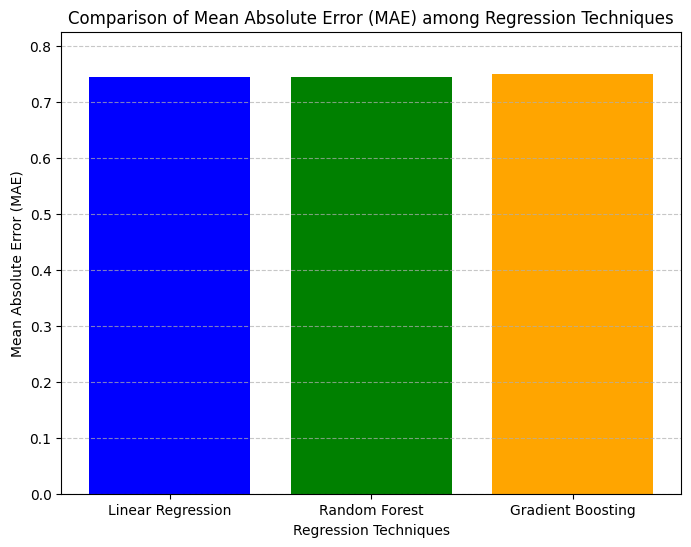

In [ ]:
mae_values = [mae, maerf, maeb]
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting']
plt.figure(figsize=(8, 6))
plt.bar(models, mae_values, color=['blue', 'green', 'orange'])
plt.xlabel('Regression Techniques')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of Mean Absolute Error (MAE) among Regression Techniques')
plt.ylim(0, max(mae_values) * 1.1)  # Set ylim slightly above max value for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
print("Mean Absolute Error (Linear Regression):", mae)
print("Mean Absolute Error (RandomForestRegressor):", maerf)
print("Mean Absolute Error (GradientBoostingRegressor):", maeb)

Mean Absolute Error (Linear Regression): 0.7439114638021552
Mean Absolute Error (RandomForestRegressor): 0.7439114638021552
Mean Absolute Error (GradientBoostingRegressor): 0.7505339902212264


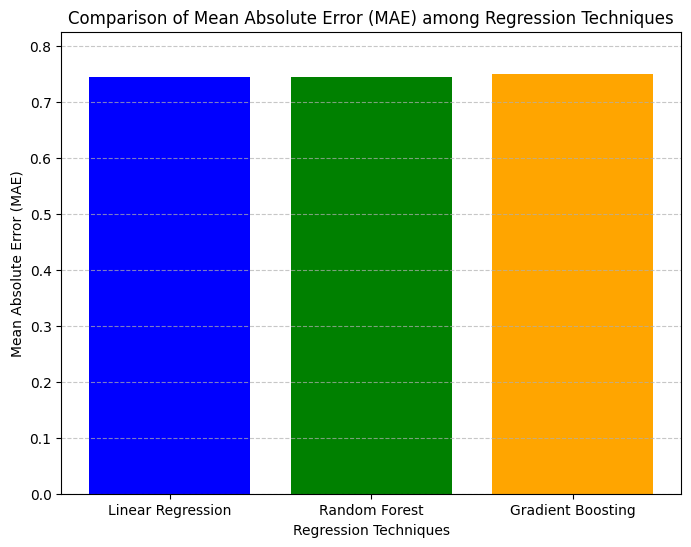

Mean Absolute Error (Linear Regression): 0.7439114638021552
Mean Absolute Error (RandomForestRegressor): 0.7439114638021552
Mean Absolute Error (GradientBoostingRegressor): 0.7505339902212264


In [ ]:
mae_values = [mae, maerf, maeb]
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting']
plt.figure(figsize=(8, 6))
plt.bar(models, mae_values, color=['blue', 'green', 'orange'])
plt.xlabel('Regression Techniques')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of Mean Absolute Error (MAE) among Regression Techniques')
plt.ylim(0, max(mae_values) * 1.1)  # Set ylim slightly above max value for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print("Mean Absolute Error (Linear Regression):", mae)
print("Mean Absolute Error (RandomForestRegressor):", maerf)
print("Mean Absolute Error (GradientBoostingRegressor):", maeb)


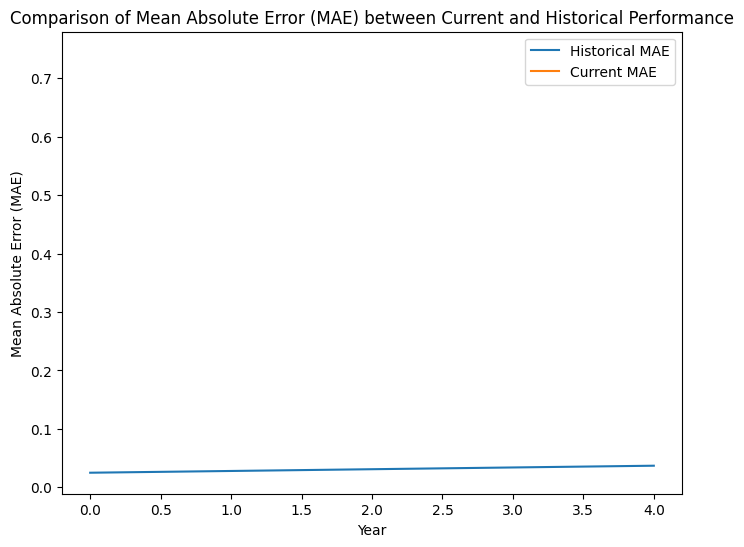

In [ ]:
# prompt: Compare the current maerf to historical performance

# Save the current maerf
best_maerf = maerf

# Load the historical maerf values from a file
with open('maerf_history.txt', 'r') as f:
  historical_maerf = f.readlines()

# Convert the historical maerf values to floats
historical_maerf = [float(x) for x in historical_maerf]

# Compare the current maerf to the historical values
print("Current maerf:", maerf)
print("Historical maerf:")
for value in historical_maerf:
  print(value)

# Check if the current maerf is better than the historical values
if maerf < min(historical_maerf):
  print("Current maerf is the best so far!")

# Append the current maerf to the historical maerf file
with open('maerf_history.txt', 'a') as f:
  f.write(str(maerf) + '\n')


In [ ]:
print("Mean Absolute Error:", maerf)

Mean Absolute Error: 0.7439114638021552


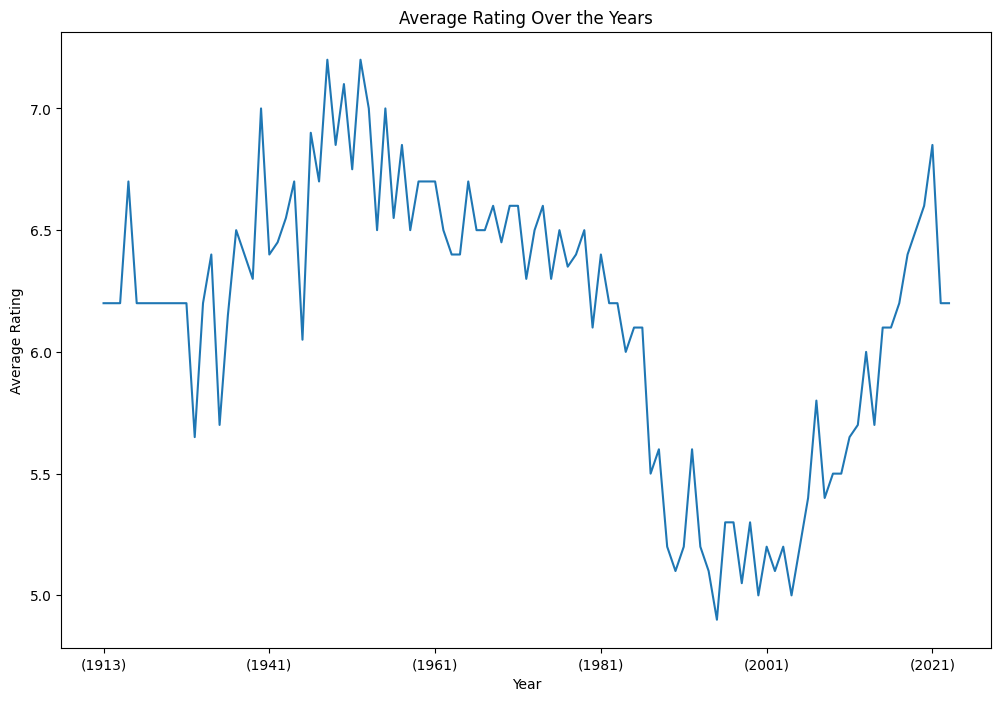

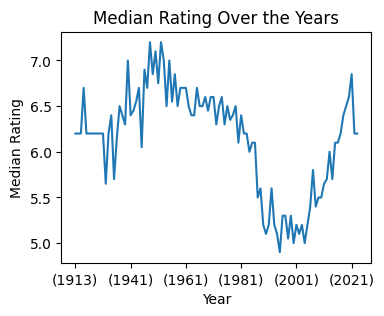

In [79]:
df.groupby('Year')['Rating'].median().plot(figsize=(12,8))
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating Over the Years')
plt.show()
df.groupby('Year')['Rating'].median().plot(figsize=(4,3))
plt.xlabel('Year')
plt.ylabel('Median Rating')
plt.title('Median Rating Over the Years')
plt.show()


In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor as SKRandomForestRegressor
from sklearn.metrics import mean_absolute_error
# Initialize SparkSession
spark = SparkSession.builder \
    .appName("Movieratingprediction") \
    .getOrCreate()

# Convert pandas DataFrame to Spark DataFrame
df_spark = spark.createDataFrame(df)

# Define features and target variable
feature_columns = ['Genre_encoded', 'First Actor_encoded', 'Second Actor_encoded', 'Third Actor_encoded', 'Director_encoded']
target_column = 'Rating'

# Ensure consistency in feature engineering between pandas and Spark
# For example, if one-hot encoding was done differently, adjust it here

# Split data into training and testing sets consistently in both pandas and Spark
X = df[feature_columns]
y = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert pandas DataFrames to Spark DataFrames
train_data = spark.createDataFrame(pd.concat([X_train, y_train], axis=1))
test_data = spark.createDataFrame(pd.concat([X_test, y_test], axis=1))

# Assemble features into a single vector
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
train_data = assembler.transform(train_data)
test_data = assembler.transform(test_data)

# Initialize RandomForestRegressor model with default parameters
rf_spark = RandomForestRegressor(featuresCol="features", labelCol=target_column)

# Train the model on Spark DataFrame
model_spark = rf_spark.fit(train_data)

# Make predictions on the testing set using Spark model
predictions_spark = model_spark.transform(test_data)

# Evaluate the Spark model
evaluator_spark = RegressionEvaluator(labelCol=target_column, predictionCol="prediction", metricName="mae")
mae_spark = evaluator_spark.evaluate(predictions_spark)
print("Mean Absolute Error (Spark):", mae_spark)

# Train the RandomForestRegressor model on pandas DataFrame with default parameters
model_sklearn = SKRandomForestRegressor(random_state=42)
model_sklearn.fit(X_train, y_train)

# Make predictions on the testing set using sklearn model
predictions_sklearn = model_sklearn.predict(X_test)

# Evaluate the sklearn model
mae_sklearn = mean_absolute_error(y_test, predictions_sklearn)
print("Mean Absolute Error (sklearn):", mae_sklearn)

# Stop SparkSession
spark.stop()


Mean Absolute Error (Spark): 0.7929903405495141
Mean Absolute Error (sklearn): 0.7439114638021552
